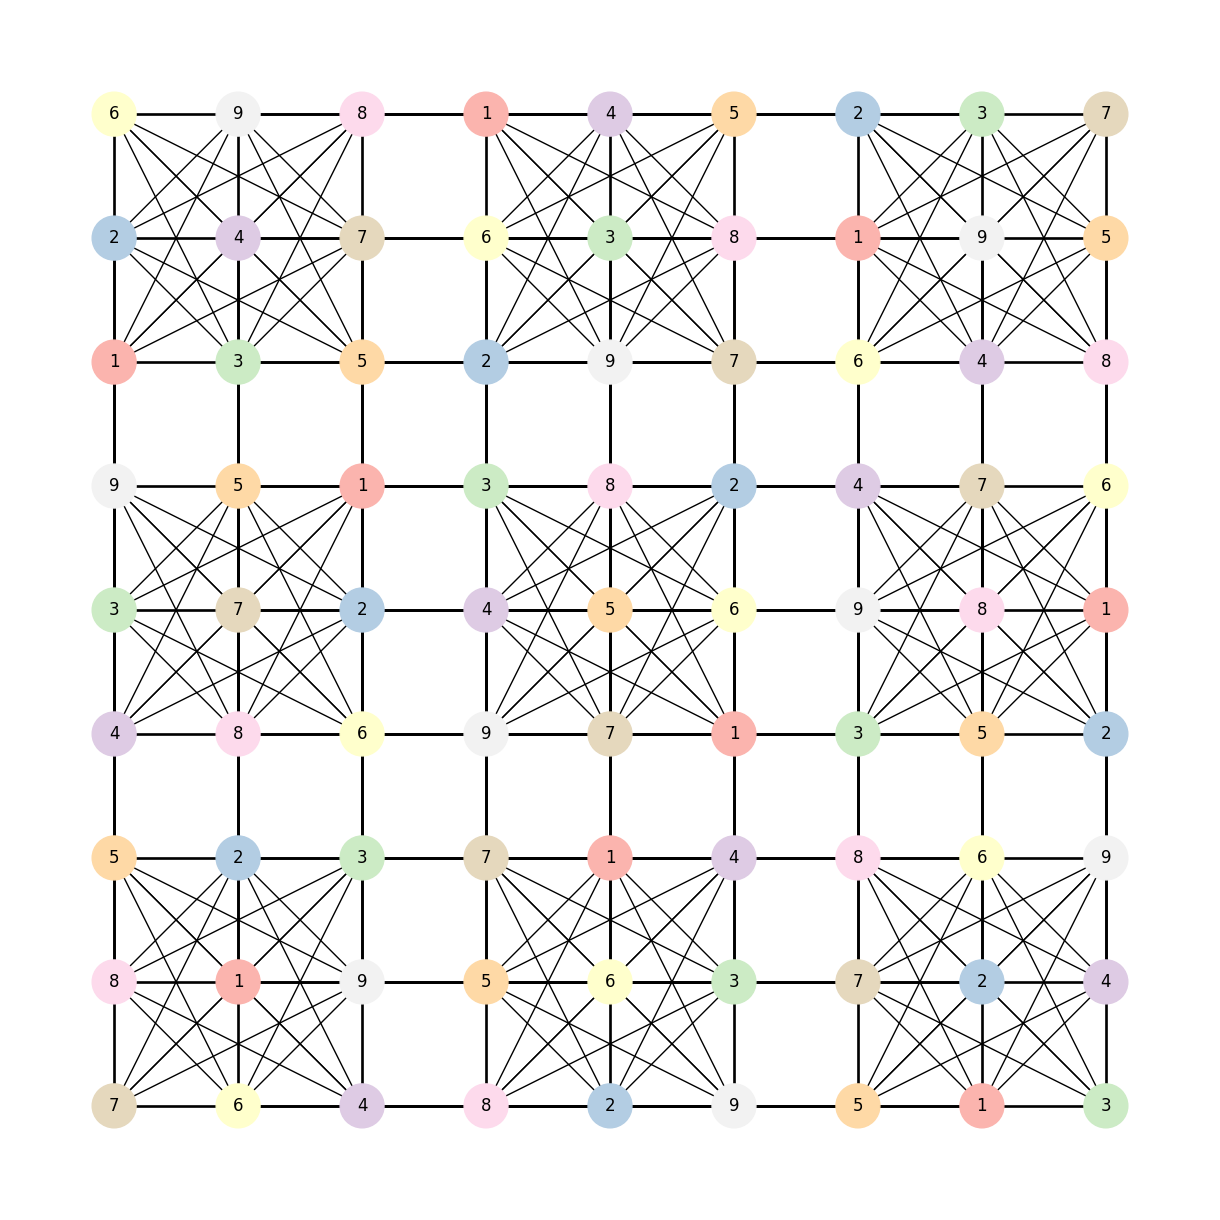

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

# Sudoku solving function
def solve_sudoku(board):
    # Helper function to check if a digit can be placed at a given position
    def is_valid(row, col, num):
        # Check row
        if num in board[row]:
            return False
        # Check column
        if num in board[:, col]:
            return False
        # Check subgrid
        subrow, subcol = 3 * (row // 3), 3 * (col // 3)
        if num in board[subrow:subrow + 3, subcol:subcol + 3]:
            return False
        return True

    # Helper function for backtracking
    def backtrack():
        for row in range(9):
            for col in range(9):
                if board[row][col] == 0:
                    for num in range(1, 10):
                        if is_valid(row, col, num):
                            board[row][col] = num
                            if backtrack():
                                return True
                            board[row][col] = 0
                    return False
        return True

    if not backtrack():
        raise ValueError("No solution exists.")
    return board

# Create Sudoku puzzle
puzzle = np.asarray(
    [
        [7, 8, 0, 4, 0, 0, 1, 2, 0],
        [6, 0, 0, 0, 7, 5, 0, 0, 9],
        [0, 0, 0, 6, 0, 1, 0, 7, 8],
        [0, 0, 7, 0, 4, 0, 2, 6, 0],
        [0, 0, 1, 0, 5, 0, 9, 3, 0],
        [9, 0, 4, 0, 6, 0, 0, 0, 5],
        [0, 7, 0, 3, 0, 0, 0, 1, 2],
        [1, 2, 0, 0, 0, 7, 4, 0, 0],
        [0, 4, 9, 2, 0, 6, 0, 0, 7]
    ]
)

# Solve Sudoku puzzle
solved_puzzle = solve_sudoku(puzzle)

# Create Sudoku graph
n = 3
G = nx.sudoku_graph(n)
mapping = dict(zip(G.nodes(), solved_puzzle.flatten()))
pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))

# Map nodes 1-9 to a colormap
low, *_, high = sorted(mapping.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Pastel1)

# Draw the graph with colored vertices
plt.figure(figsize=(12, 12))
nx.draw(
    G,
    labels=mapping,
    pos=pos,
    with_labels=True,
    node_color=[mapper.to_rgba(i) for i in mapping.values()],
    width=1,
    node_size=1000,
)
plt.show()
